In [1]:
cd C:\Users\kvnzh\Desktop\Basketball

C:\Users\kvnzh\Desktop\Basketball


In [2]:
import numpy as np
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

import statsmodels.api as sm

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

# Linear Regression for points above team average

In [7]:
df = pd.read_csv('Merged_DataSet.csv')
df.dtypes

Unnamed: 0                int64
Unnamed: 0.1              int64
Unnamed: 0.1.1            int64
Start (ET)               object
Away?                    object
Opponent                 object
TeamPts                 float64
OppPts                  float64
Team                     object
TeamName                 object
Location                 object
PreviousLocation         object
DistanceFromPrevious    float64
Datetime                 object
DaysBetweenGames        float64
SeasonAveragePPG        float64
PTSoverAVG              float64
OppName                  object
Year_x                    int64
Mon                       int64
Day                       int64
ForBR                     int64
FG                        int64
FGA                       int64
FG%                     float64
3P                        int64
3PA                       int64
3P%                     float64
FT                        int64
FTA                       int64
FT%                     float64
ORB     

In [8]:
df.loc[df['Away?'] == '@','Away?']=1
df['Away?'] = df['Away?'].fillna(0)

In [9]:
#Label X & Y
X = df[['DistanceFromPrevious','DaysBetweenGames','Away?']]
Y = df['PTSoverAVG']

In [10]:
# use sklearn
df.replace([np.inf, -np.inf], np.nan, inplace=True)
regr = sklearn.linear_model.LinearRegression()
regr.fit(X,Y)

LinearRegression()

In [11]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.10287696391889219
Coefficients: 
 [-8.27852293e-05  5.12740698e-01 -2.27009474e+00]


In [12]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             PTSoverAVG   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     18.69
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           4.77e-12
Time:                        21:47:39   Log-Likelihood:                -19005.
No. Observations:                4860   AIC:                         3.802e+04
Df Residuals:                    4856   BIC:                         3.804e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1029 

# Linear Regression for points (absolute)

In [13]:
#Label X & Y
X2 = df[['DistanceFromPrevious','DaysBetweenGames','Away?']]
Y2 = df['TeamPts']

In [14]:
# use sklearn and ensure no infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
regr = sklearn.linear_model.LinearRegression()
regr.fit(X2,Y2)

LinearRegression()

In [15]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 108.85507304887437
Coefficients: 
 [-4.63500243e-06  5.05405317e-01 -2.32439539e+00]


In [16]:
# with statsmodels
X2 = sm.add_constant(X2) # adding a constant
model = sm.OLS(Y2, X2).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                TeamPts   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     17.44
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           2.93e-11
Time:                        21:47:39   Log-Likelihood:                -19184.
No. Observations:                4860   AIC:                         3.838e+04
Df Residuals:                    4856   BIC:                         3.840e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  108.8551 

# Linear Regression for opponent points (absolute)

In [17]:
#Label X & Y
X3 = df[['DistanceFromPrevious','DaysBetweenGames','Away?']]
Y3 = df['OppPts']

In [18]:
# use sklearn and ensure no infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
regr = sklearn.linear_model.LinearRegression()
regr.fit(X3,Y3)

LinearRegression()

In [19]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 107.0951159173571
Coefficients: 
 [-2.41804188e-04  2.84073353e-01  2.56705115e+00]


In [20]:
# with statsmodels
X3 = sm.add_constant(X3) # adding a constant
model = sm.OLS(Y3, X3).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 OppPts   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     15.79
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           3.25e-10
Time:                        21:47:39   Log-Likelihood:                -19185.
No. Observations:                4860   AIC:                         3.838e+04
Df Residuals:                    4856   BIC:                         3.840e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  107.0951 

# Linear regression for efficiency (FG%)

In [21]:
#Label X & Y
X3 = df[['DistanceFromPrevious','DaysBetweenGames','Away?']]
Y3 = df['FG%']

In [22]:
# use sklearn and ensure no infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
regr = sklearn.linear_model.LinearRegression()
regr.fit(X3,Y3)

LinearRegression()

In [23]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.46502633229906876
Coefficients: 
 [ 1.14910817e-06  3.55265689e-04 -1.07283624e-02]


In [24]:
# with statsmodels
X3 = sm.add_constant(X3) # adding a constant
model = sm.OLS(Y3, X3).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    FG%   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     14.93
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           1.13e-09
Time:                        21:48:35   Log-Likelihood:                 7305.8
No. Observations:                4860   AIC:                        -1.460e+04
Df Residuals:                    4856   BIC:                        -1.458e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4650 

# Linear regression for efficiency (3PT%)

In [25]:
#Label X & Y
X3 = df[['DistanceFromPrevious','DaysBetweenGames','Away?']]
Y3 = df['3P%']

In [26]:
# use sklearn and ensure no infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
regr = sklearn.linear_model.LinearRegression()
regr.fit(X3,Y3)

LinearRegression()

In [27]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.35884368998665556
Coefficients: 
 [ 1.56688760e-06  8.66657925e-05 -4.29278169e-03]


In [28]:
# with statsmodels
X3 = sm.add_constant(X3) # adding a constant
model = sm.OLS(Y3, X3).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    3P%   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9411
Date:                Mon, 18 Jan 2021   Prob (F-statistic):              0.420
Time:                        21:49:58   Log-Likelihood:                 4874.6
No. Observations:                4860   AIC:                            -9741.
Df Residuals:                    4856   BIC:                            -9715.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3588 

# Linear regression for turnovers

In [29]:
#Label X & Y
X3 = df[['DistanceFromPrevious','DaysBetweenGames','Away?']]
Y3 = df['TOV']

In [30]:
# use sklearn and ensure no infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
regr = sklearn.linear_model.LinearRegression()
regr.fit(X3,Y3)

LinearRegression()

In [31]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 13.516614857259741
Coefficients: 
 [-1.49986099e-05  2.28914380e-02  7.91566657e-02]


In [32]:
# with statsmodels
X3 = sm.add_constant(X3) # adding a constant
model = sm.OLS(Y3, X3).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    TOV   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1949
Date:                Mon, 18 Jan 2021   Prob (F-statistic):              0.900
Time:                        21:50:54   Log-Likelihood:                -13383.
No. Observations:                4860   AIC:                         2.677e+04
Df Residuals:                    4856   BIC:                         2.680e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   13.5166 

# Plots

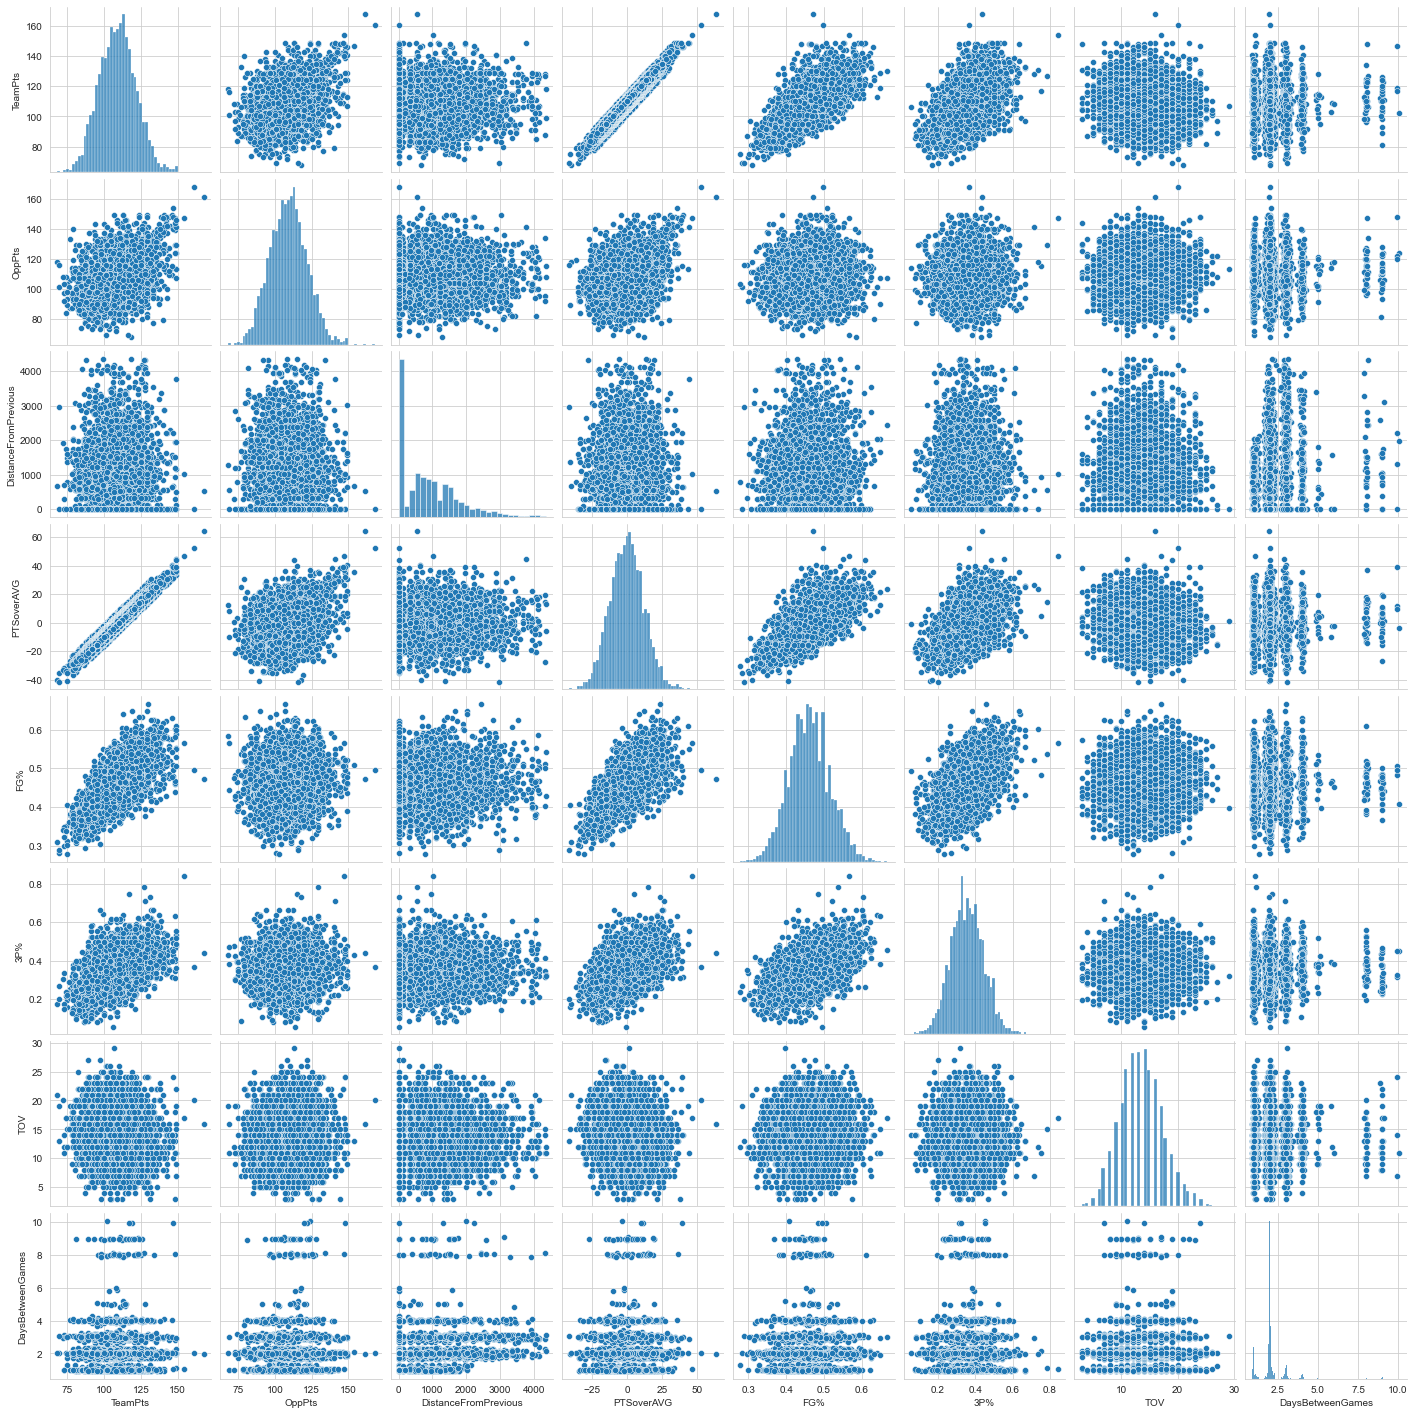

In [38]:
sb.pairplot(df,
           x_vars=['TeamPts','OppPts','DistanceFromPrevious','PTSoverAVG','FG%','3P%','TOV','DaysBetweenGames'],
           y_vars=['TeamPts','OppPts','DistanceFromPrevious','PTSoverAVG','FG%','3P%','TOV','DaysBetweenGames'])